In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [3]:
X[0], y[0]

(array([0.74908024]), array([6.33428778]))

Text(0, 0.5, '<----$y$---->')

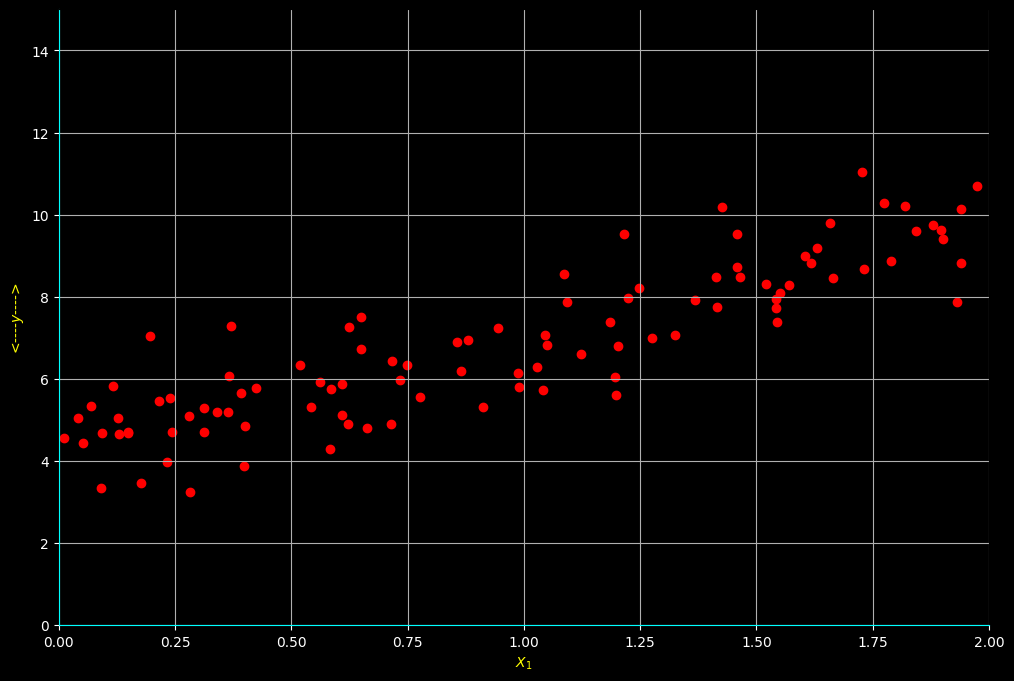

In [4]:
# plotting
plt.figure(figsize=(12, 8), facecolor="black")  # for the outer thing where labels are
ax = plt.gca()
ax.set_facecolor("black")  # for the main portion
ax.spines["bottom"].set_color("cyan")
ax.spines["left"].set_color("cyan")
ax.xaxis.label.set_color("yellow")
ax.yaxis.label.set_color("yellow")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
plt.scatter(X, y, c="r")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.xlabel("$X_1$")
plt.ylabel("<----$y$---->")

In [5]:
# calc 0 using normal eq
X_b = add_dummy_feature(X)  # adds x0 =1 to each instance
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # @ is matrix mul operator

`The @ operator performs matrix multiplication. If A and B are NumPy arrays, then A @ B
is equivalent to np.matmul(A, B). Many other libraries, like TensorFlow, PyTorch, and
JAX, support the @ operator as well. However, you cannot use @ on pure Python arrays
(i.e., lists of lists).
`


In [6]:
theta
# m = 4.21..... close to our original 4
# c = 2.77..... less than original 3
# noise made it impossible to recover the exact parameters of the original function

array([[4.21509616],
       [2.77011339]])

In [7]:
# making prediction using theta
X_new = np.array([[0], [2]])  # a 2d matrix
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta
y_predict

array([[4.21509616],
       [9.75532293]])

Text(0, 0.5, '<----$y$---->')

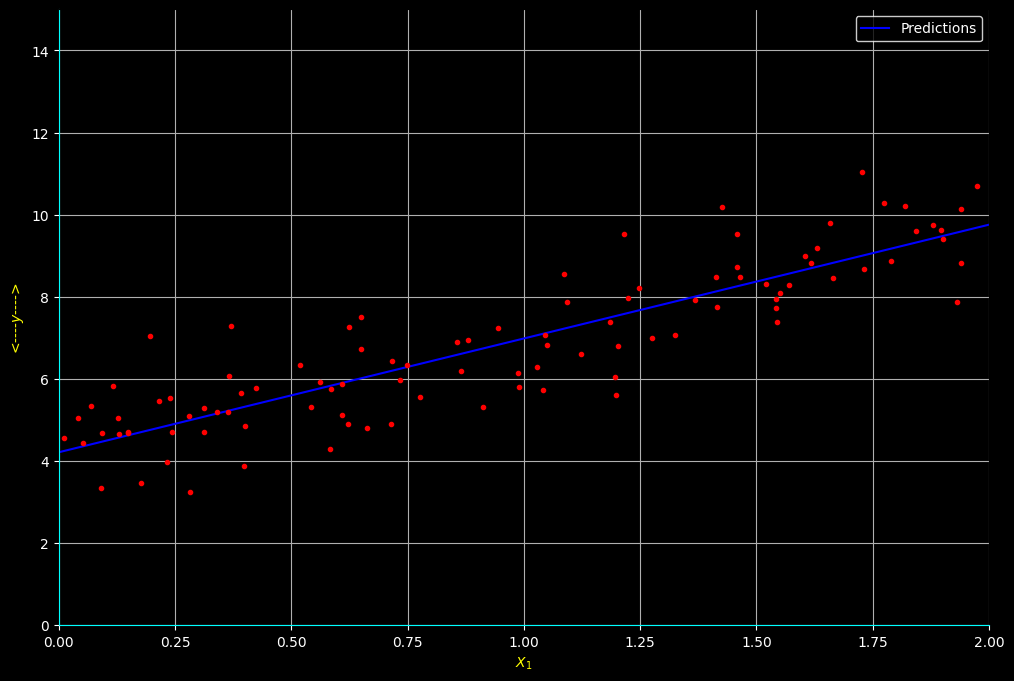

In [8]:
# plotting
plt.figure(figsize=(12, 8), facecolor="black")  # for the outer thing where labels are
ax = plt.gca()
ax.set_facecolor("black")  # for the main portion
ax.spines["bottom"].set_color("cyan")
ax.spines["left"].set_color("cyan")
ax.xaxis.label.set_color("yellow")
ax.yaxis.label.set_color("yellow")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
plt.plot(X_new, y_predict, "b-", label="Predictions")
legend = plt.legend(facecolor="black", edgecolor="white")
for text in legend.get_texts():
    text.set_color("white")
plt.plot(X, y, "r.")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.xlabel("$X_1$")
plt.ylabel("<----$y$---->")

In [9]:
# trying with Sklearn linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

# Gradient Descent


`When using gradient descent, you should ensure that all features have a similar scale (e.g.,
using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
`


In [10]:
eta = 0.1  # learning rate
n_epochs = 1000  # iterations
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialised model-parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta -= eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

# Stochastic GD


In [12]:
n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)


np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):  # number of instances
        random_idx = np.random.randint(m)
        xi = X_b[random_idx : random_idx + 1]
        yi = y[random_idx : random_idx + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

`Note that since instances are picked randomly, some instances may be picked
several times per epoch, while others may not be picked at all. If you want to
be sure that the algorithm goes through every instance at each epoch, another
approach is to shuffle the training set (making sure to shuffle the input
features and the labels jointly), then go through it instance by instance, then
shuffle it again, and so on. However, this approach is more complex, and it
generally does not improve the result`


`When using stochastic gradient descent, the training instances must be independent and
identically distributed (IID) to ensure that the parameters get pulled toward the global
optimum, on average. A simple way to ensure this is to shuffle the instances during
training (e.g., pick each instance randomly, or shuffle the training set at the beginning of
each epoch). If you do not shuffle the instances—for example, if the instances are sorted
by label—then SGD will start by optimizing for one label, then the next, and so on, and it
will not settle close to the global minimum.`


In [14]:
sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42,
)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

`All Scikit-Learn estimators can be trained using the fit() method, but some estimators also
have a partial_fit() method that you can call to run a single round of training on one or
more instances (it ignores hyperparameters like max_iter or tol). Repeatedly calling
partial_fit() will gradually train the model. This is useful when you need more control over
the training process. Other models have a warm_start hyperparameter instead (and some
have both): if you set warm_start=True, calling the fit() method on a trained model will
not reset the model; it will just continue training where it left off, respecting
hyperparameters like max_iter and tol. Note that fit() resets the iteration counter used by
the learning schedule, while partial_fit() does not`


![alt text](<Screenshot 2024-08-31 153451.png>)


# Polynomial Regression


In [16]:
# creating a toy dataset
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, '<----$y$---->')

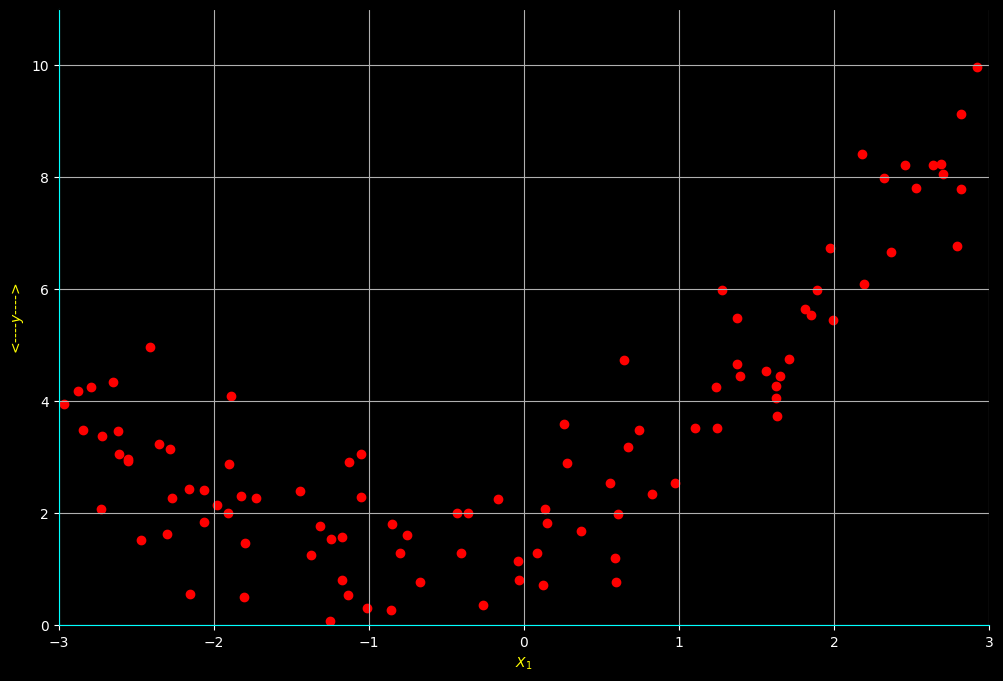

In [17]:
plt.figure(figsize=(12, 8), facecolor="black")  # for the outer thing where labels are
ax = plt.gca()
ax.set_facecolor("black")  # for the main portion
ax.spines["bottom"].set_color("cyan")
ax.spines["left"].set_color("cyan")
ax.xaxis.label.set_color("yellow")
ax.yaxis.label.set_color("yellow")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
plt.scatter(X, y, c="r")
plt.grid()
plt.axis([-3, 3, 0, 11])
plt.xlabel("$X_1$")
plt.ylabel("<----$y$---->")

In [18]:
# adding polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [19]:
# preds
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
preds = lin_reg.predict(X_poly)

In [20]:
train_size, train_score, val_scores = learning_curve(
    LinearRegression(),
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_error = -train_score.mean(axis=1)
val_error = -val_scores.mean(axis=1)

In [21]:
plt.figure(figsize=(12, 8), facecolor="black")

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'RMSE')

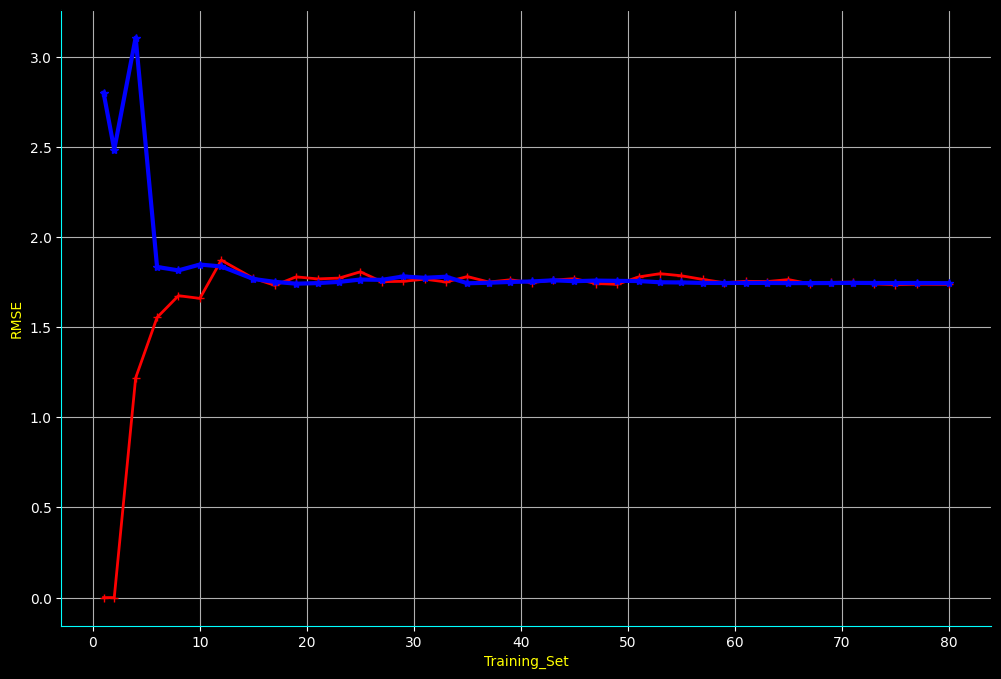

In [22]:
plt.figure(figsize=(12, 8), facecolor="black")  # for the outer thing where labels are
ax = plt.gca()
ax.set_facecolor("black")  # for the main portion
ax.spines["bottom"].set_color("cyan")
ax.spines["left"].set_color("cyan")
ax.xaxis.label.set_color("yellow")
ax.yaxis.label.set_color("yellow")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
plt.grid()
plt.plot(train_size, train_error, "r-+", linewidth=2, label="TRAIN")
plt.plot(train_size, val_error, "b-*", linewidth=3, label="VALID")
plt.xlabel("Training_Set")
plt.ylabel("RMSE")
## plateau formation indicates underfiting

`If your model is underfitting the training data, adding more training examples will not
help. You need to use a better model or come up with better features.`


Text(0, 0.5, 'RMSE')

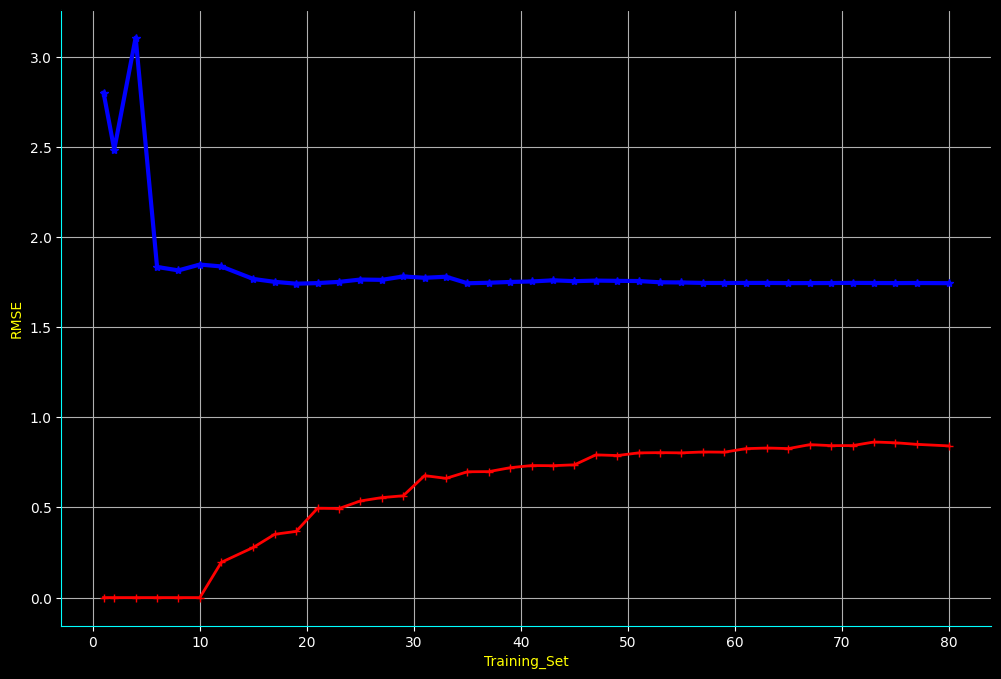

In [23]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False), LinearRegression()
)

train_sizes, train_scores, val_errors = learning_curve(
    polynomial_regression,
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.figure(figsize=(12, 8), facecolor="black")  # for the outer thing where labels are
ax = plt.gca()
ax.set_facecolor("black")  # for the main portion
ax.spines["bottom"].set_color("cyan")
ax.spines["left"].set_color("cyan")
ax.xaxis.label.set_color("yellow")
ax.yaxis.label.set_color("yellow")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
plt.grid()
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="TRAIN")
plt.plot(train_sizes, val_errors, "b-*", linewidth=3, label="VALID")
plt.xlabel("Training_Set")
plt.ylabel("RMSE")

# this one overfits... gap in curves signifies the model work better on training than on validation set

`One way to improve an overfitting model is to feed it more training data until the
validation error reaches the training error.
`


# Regularised Linear Model


In [24]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [26]:
sgd_reg = SGDRegressor(
    penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42
)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [27]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

In [28]:
#  shows the closed form solution of Ridge regression,
#  compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0.0, 0.0], [0.0, 1.0]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [29]:
ridge_reg.intercept_, ridge_reg.coef_  # checking intercepts

(array([0.97896386]), array([[0.38286422]]))

`The RidgeCV class also performs ridge regression, but it automatically tunes
hyperparameters using cross-validation. It’s roughly equivalent to using GridSearchCV,
but it’s optimized for ridge regression and runs much faster. Several other estimators
(mostly linear) also have efficient CV variants, such as LassoCV and ElasticNetCV.
`


# Lasso Regression


`To keep gradient descent from bouncing around the optimum at the end when using lasso regression, you need to gradually reduce the learning rate during training. It will still
bounce around the optimum, but the steps will get smaller and smaller, so it will converge.
`


In [30]:
Lasso_reg = Lasso(alpha=0.1)
Lasso_reg.fit(X, y)
Lasso_reg.predict([[1.5]])

array([1.53788174])

In [31]:
# checking with sgd
sgd_reg = SGDRegressor(
    alpha=2 * 0.1, penalty="l1", max_iter=1000, eta0=0.01, random_state=42
)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.42021052])

# Elastic Net regularization

![alt text](<Screenshot 2024-09-01 231712.png>)


In [32]:
Elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
Elastic_reg.fit(X, y)
Elastic_reg.predict([[1.5]])

array([1.54333232])

# Early stoping


`With stochastic and mini-batch gradient descent, the curves are not so smooth, and it may
be hard to know whether you have reached the minimum or not. One solution is to stop
only after the validation error has been above the minimum for some time (when you are
confident that the model will not do any better), then roll back the model parameters to the
point where the validation error was at a minimum.`


c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

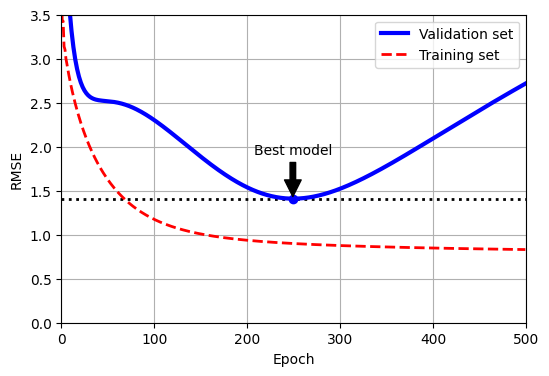

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_tr, y_tr = X[: m // 2], y[: m // 2, 0]
x_val, y_val = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), StandardScaler()
)
X_tr_prep = preprocessing.fit_transform(X_tr)
X_valid_prep = preprocessing.transform(x_val)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_val_rmse = float("inf")
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_tr_prep, y_tr)
    y_val_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_val, y_val_predict, squared=False)
    if val_error < best_val_rmse:
        best_val_rmse = val_error
        best_model = deepcopy(sgd_reg)
    y_train_predict = sgd_reg.predict(X_tr_prep)
    train_error = mean_squared_error(y_tr, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate(
    "Best model",
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 0.5),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.05),
)
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_val_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

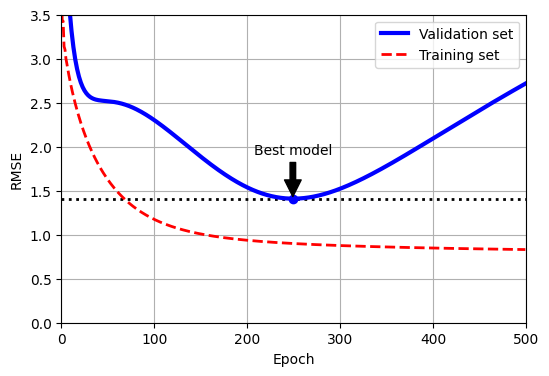

In [34]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float("inf")

train_errors, val_errors = [], []  # extra code – for the plot

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(
            sgd_reg
        )  # deepcopy is used here so as to not stop the training and copy both params and hyperparams... if we terminate training here there is a chance we may go lower in future but it'll be missed.... got it???

    # extra code – we evaluate the train error and save it for the plot
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20 of book [Hands on machine learning ed3]
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate(
    "Best model",
    xy=(best_epoch, best_valid_rmse),
    xytext=(best_epoch, best_valid_rmse + 0.5),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.05),
)
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

plt.show()

In [35]:
best_model.coef_, best_model.intercept_, best_val_rmse

(array([ 7.70613958e-01,  7.73955364e-01,  3.63751036e-01,  4.79272450e-01,
         1.84176921e-01,  2.97766535e-01,  9.56101662e-02,  1.82261427e-01,
         4.67357047e-02,  1.05751742e-01,  1.76613875e-02,  5.32971528e-02,
        -4.76288524e-04,  1.66539845e-02, -1.21091122e-02, -8.99764867e-03,
        -1.96409508e-02, -2.67063333e-02, -2.44558518e-02, -3.85443598e-02,
        -2.73920131e-02, -4.59977380e-02, -2.89822764e-02, -5.01692203e-02,
        -2.95821673e-02, -5.18933318e-02, -2.94403208e-02, -5.18079204e-02,
        -2.87382355e-02, -5.04025286e-02, -2.76132850e-02, -4.80531709e-02,
        -2.61724183e-02, -4.50483255e-02, -2.45006020e-02, -4.16087756e-02,
        -2.26662387e-02, -3.79029077e-02, -2.07248111e-02, -3.40585506e-02,
        -1.87214555e-02, -3.01721430e-02, -1.66928646e-02, -2.63158286e-02,
        -1.46687517e-02, -2.25429432e-02, -1.26730142e-02, -1.88922577e-02,
        -1.07246792e-02, -1.53912606e-02, -8.83868565e-03, -1.20587008e-02,
        -7.0

# Iris dataset and visualisation for decison boundary


In [36]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [37]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
iris.target.head()  # unshuffled data

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [41]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)  # model trained

LogisticRegression(random_state=42)

In [43]:
# generating dummy values to test
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_probs = log_reg.predict_proba(X_new)

In [44]:
X_new.shape, y_probs.shape

((1000, 1), (1000, 2))

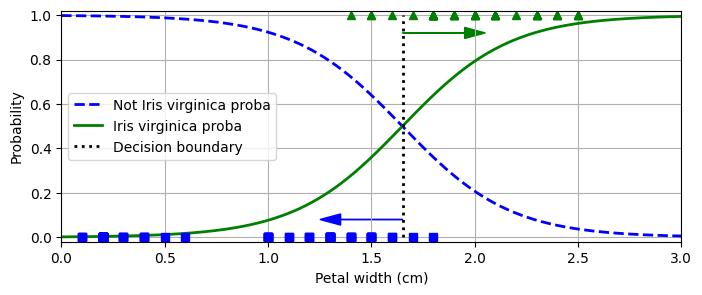

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_probs[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code –  just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot(
    [decision_boundary, decision_boundary],
    [0, 1],
    "k:",
    linewidth=2,
    label="Decision boundary",
)

# extra code – for better visualisation
plt.arrow(
    x=decision_boundary,
    y=0.08,
    dx=-0.3,
    dy=0,
    head_width=0.05,
    head_length=0.1,
    fc="b",
    ec="b",
)
plt.arrow(
    x=decision_boundary,
    y=0.92,
    dx=0.3,
    dy=0,
    head_width=0.05,
    head_length=0.1,
    fc="g",
    ec="g",
)
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()


plt.show()

In [46]:
decision_boundary

1.6516516516516517

In [47]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [48]:
# now test on both petal length and width
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

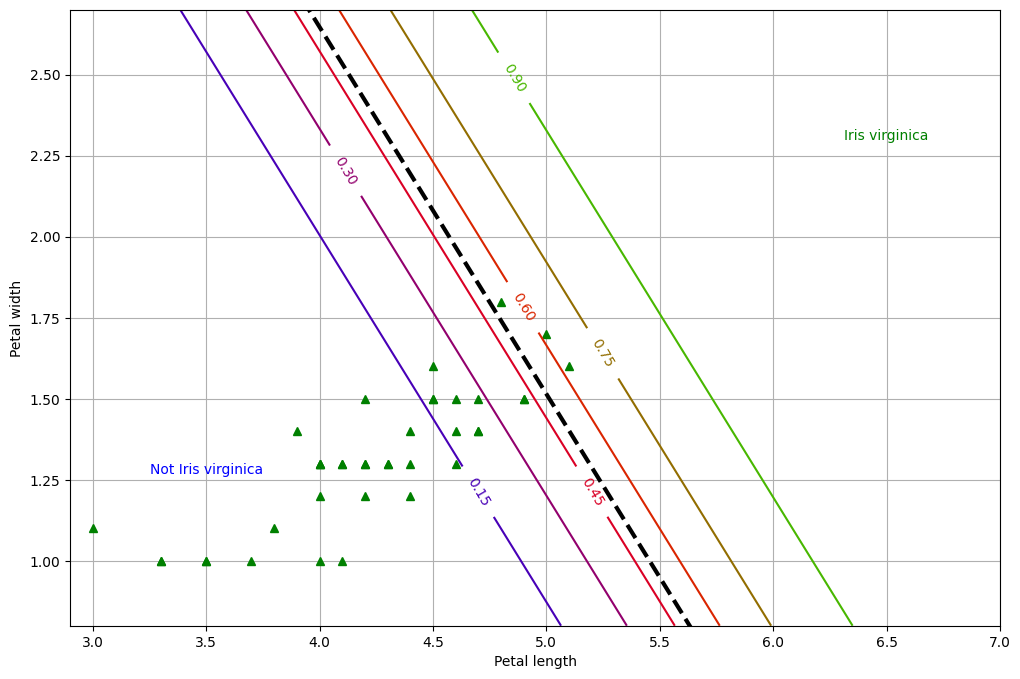

In [54]:
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
left_right = np.array([2.9, 7])
boundary = -(
    (log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0, 1]
)
plt.figure(figsize=(12, 8))  # for the outer thing where labels are

plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

`The hyperparameter controlling the regularization strength of a Scikit-Learn
LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The
higher the value of C, the less the model is regularized.`


# Softmax regression


`The softmax regression classifier predicts only one class at a time (i.e., it is multiclass, not
multioutput), so it should be used only with mutually exclusive classes, such as different
species of plants. You cannot use it to recognize multiple people in one picture.
`


In [50]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [51]:
softmax_reg.predict([[5, 2]])  # array [2] -> run iris.target and see which class it is

array([2])

In [52]:
iris.target_names
# so it is virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
softmax_reg.predict_proba([[5, 2]]).round(2)  # scores

array([[0.  , 0.04, 0.96]])